In [9]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [8]:
# Paths. 
vlg_path = '/home/rcorona/2022/lang_nerf/vlg/snare-master/snap/test/checkpoints/val_preds.npz'
match_path = '/home/rcorona/2022/lang_nerf/vlg/snare-master/snap/clip-single_cls-maxpool/val_preds.npz'
val_json_path = '/home/rcorona/2022/lang_nerf/vlg/snare-master/amt/folds_adversarial/val.json'
screenshot_path = '/home/rcorona/2022/lang_nerf/vlg/snare-master/data/screenshots/'

In [3]:
"""
Load and preprocess predictions file. 
"""
def load_preds(path):
    preds = np.load(path)

    # Get data. 
    labels = preds['labels']
    visual = preds['visual']
    probs = preds['probs']

    # Preprocess. 
    labels = np.argmax(labels, axis=1)
    guesses = np.argmax(probs, axis=1)

    return labels, guesses, visual

In [4]:
# Load data for both models. 
labels, match_preds, visual = load_preds(match_path)
_, vlg_preds, _ = load_preds(vlg_path)

# Compute correctness for each. 
match_correct = np.equal(match_preds, labels).astype(np.int32)
vlg_correct = np.equal(vlg_preds, labels).astype(np.int32)

# Get examples that VLG beats Match on. 
better = vlg_correct * (1 - match_correct)
better_idxs = set(np.nonzero(better)[0].tolist())

# Get visual and blind indices. 
visual_idxs = set(np.nonzero(visual)[0].tolist())
blind_idxs = set(np.nonzero(1 - visual)[0].tolist())

# Get set of improvements for each split.  
visual_improvements = visual_idxs & better_idxs
blind_improvements = blind_idxs & better_idxs

In [17]:
# Get 10 improved examples for each of the two sets. 
n = 20
visual_top = list(visual_improvements)[:n]
blind_top = list(blind_improvements)[:n]

# Load validation set data. 
val_set = json.load(open(val_json_path, 'r'))

In [14]:
def visualize_example(example):
    obj1, obj2 = example['objects']

    path = os.path.join(screenshot_path, obj1, obj1 + '-6.png')
    img1 = plt.imread(path)

    path = os.path.join(screenshot_path, obj2, obj2 + '-6.png')
    img2 = plt.imread(path) 

    f, axarr = plt.subplots(1,2)
    f.patch.set_facecolor('white')
    axarr[0].imshow(img1)

    axarr[1].imshow(img2)
    axarr[int(example['ans'])].set_title(example['annotation'])

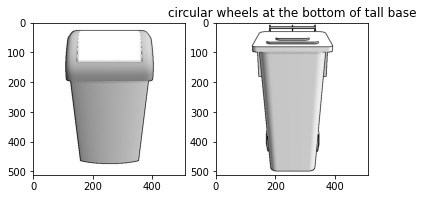

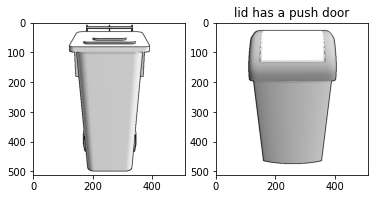

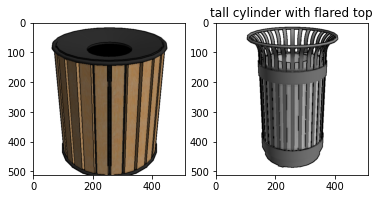

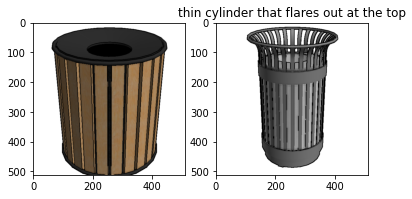

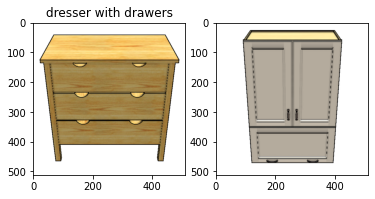

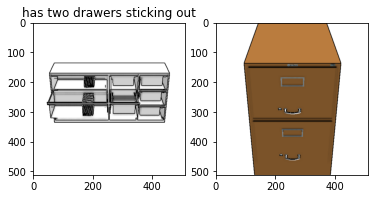

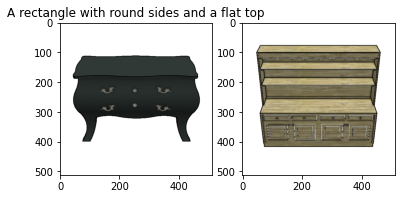

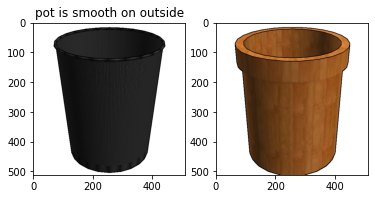

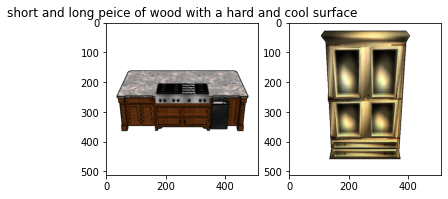

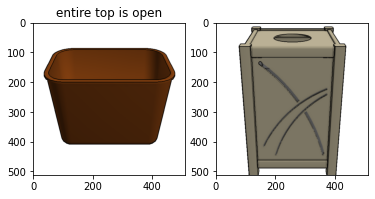

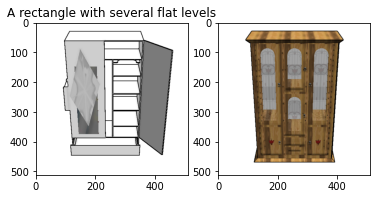

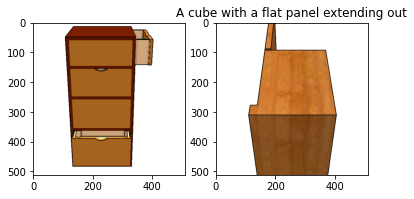

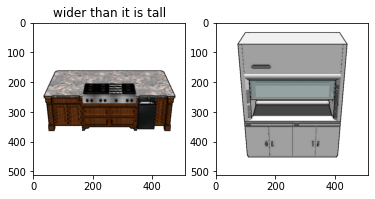

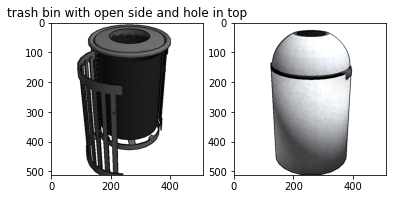

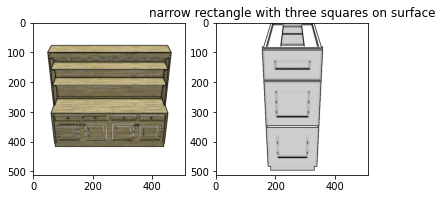

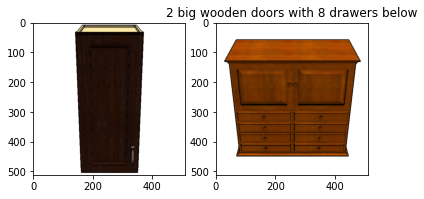

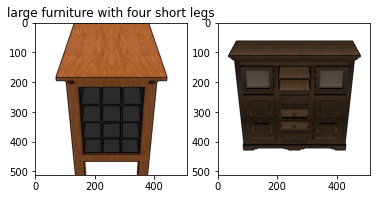

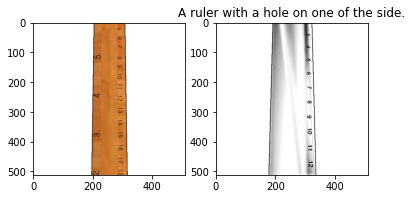

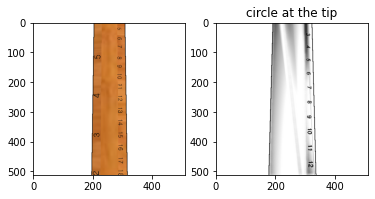

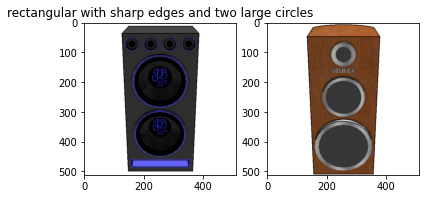

In [18]:
# Visualize all blind improvements. 
for idx in blind_top: 
    visualize_example(val_set[idx])

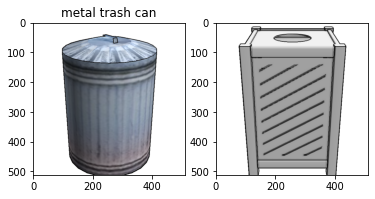

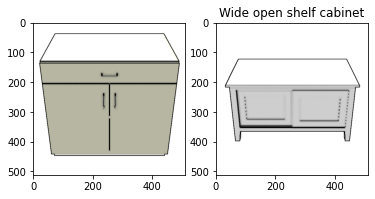

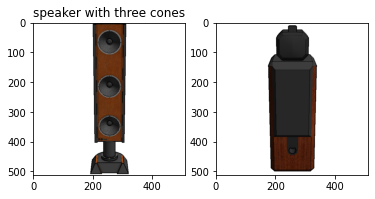

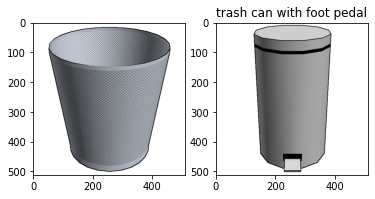

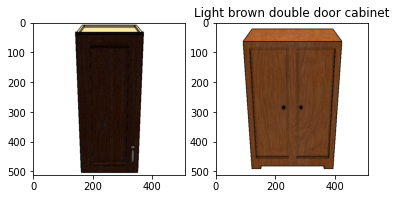

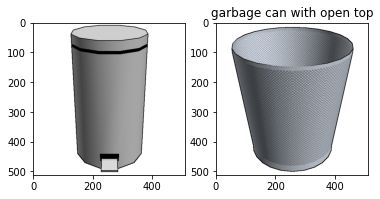

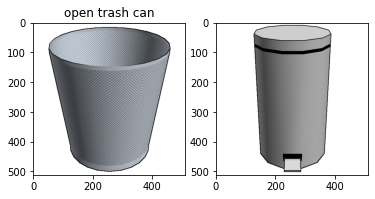

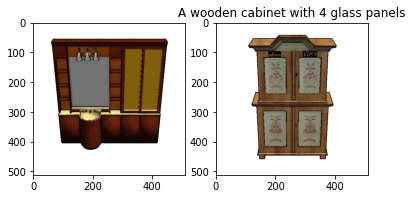

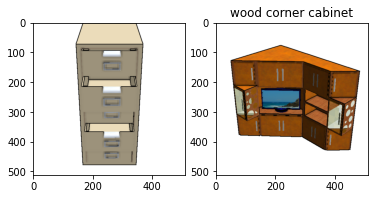

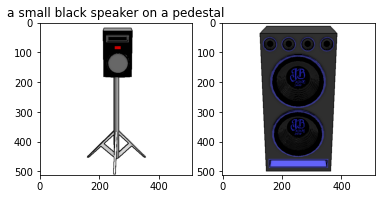

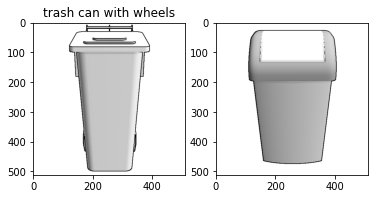

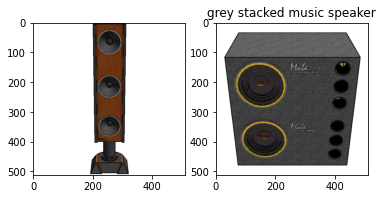

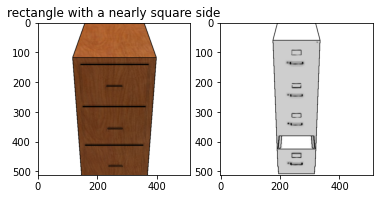

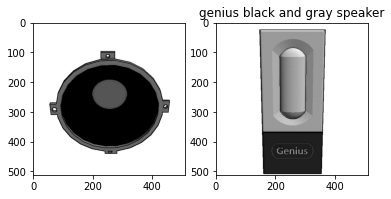

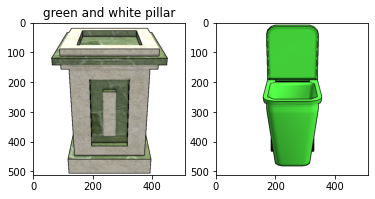

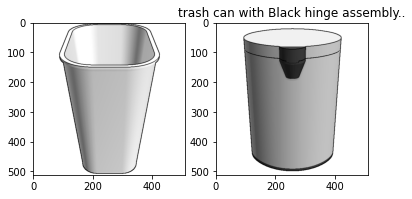

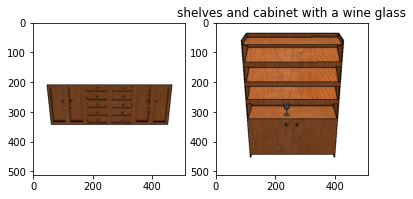

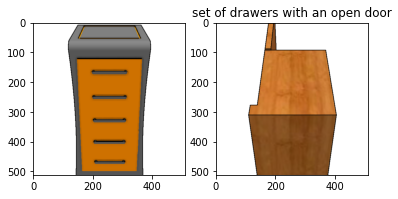

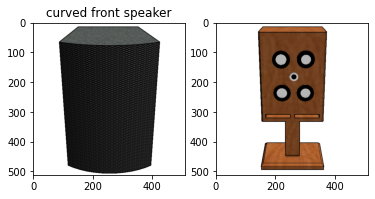

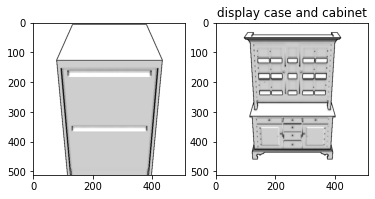

In [19]:
# Visualize visual examples. 
for idx in visual_top:
    visualize_example(val_set[idx])